In [1]:
import hvplot.pandas
import pandas as pd
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scipy.stats as stats 
from scipy.stats import shapiro

In [2]:
# Import/Read CSV

air_bnb_path = "../Data-Project-1/Ashville listings.csv"
air_bnb_asheville = pd.read_csv(air_bnb_path, encoding='latin-1')
air_bnb_asheville.head()

,id,listing_url,name,bedrooms,beds,bathrooms,accommodates,price,room_type,review_scores_rating,...,host_since,current_host_listings,total_host_listings_count,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,209068.0,https://www.airbnb.com/rooms/209068,Guest suite in Asheville,1 bedroom,2 beds,1 bath,4,95,Entire home/apt,4.85,...,8/28/2011,1,1,2,47,7/8/2023,1.43,5,318,16
1,427497.0,https://www.airbnb.com/rooms/427497,Guest suite in Asheville,1 bedroom,1 beds,1 bath,2,159,Entire home/apt,4.85,...,3/12/2012,1,1,3,47,6/12/2022,1.53,1,0,0
2,483384.0,https://www.airbnb.com/rooms/483384,Cottage in Asheville,1 bedroom,1 beds,1 bath,3,146,Entire home/apt,4.85,...,3/27/2011,1,2,1,54,9/4/2023,1.93,1,155,10
3,621243.0,https://www.airbnb.com/rooms/621243,Rental unit in Asheville,1 bedroom,2 beds,1 bath,2,155,Entire home/apt,4.85,...,7/28/2012,1,2,1,202,9/10/2023,7.36,10,151,90
4,815068.0,https://www.airbnb.com/rooms/815068,Home in Asheville,2 bedrooms,2 beds,1 bath,4,75,Entire home/apt,4.85,...,9/5/2011,1,2,2,33,11/6/2022,1.37,1,0,3


In [3]:
# Summary of Price vs Number of Bedrooms

bedrooms_price_summary = air_bnb_asheville.groupby("bedrooms").agg({"price":["mean", "median", "var", "std", "sem"]})
bedrooms_price_summary

price                                              
                    mean median            var         std         sem
bedrooms                                                              
 1 bedroom    133.345286   99.0   97649.645483  312.489433    8.052354
 2 bedrooms   167.357625  148.0    7326.970580   85.597725    3.144511
 3 bedrooms   201.037770  180.0    9666.479652   98.318257    4.169623
 4 bedrooms   308.441558  262.0   47540.099831  218.036923   14.345776
 5 bedrooms   410.153846  379.0   40930.038462  202.311736   25.093682
 6 bedrooms   477.903226  397.0  125857.890323  354.764556   63.717595
 7 bedrooms   720.733333  600.0  138787.638095  372.542129   96.189964
 8 bedrooms   586.600000  521.0   91534.300000  302.546360  135.302845
 9 bedrooms   872.800000  906.0  391031.200000  625.324876  279.653786
 Studio       102.546218  100.0     988.995727   31.448302    2.882861
campsite       23.666667   22.0      76.666667    8.755950    3.574602

In [4]:
# Summary of Price vs Number of Beds

beds_price_summary = air_bnb_asheville.groupby("beds").agg({"price":["mean", "median", "var", "std", "sem"]})
beds_price_summary

price                                              
                mean median            var         std         sem
beds                                                              
 0 bed     22.750000   22.0      20.250000    4.500000    2.250000
 1 beds   121.838710   95.0   14651.857907  121.044859    3.574083
 2 beds   160.789944  125.0  149430.877527  386.562902   12.921373
 3 beds   177.558712  155.5    7652.087628   87.476212    3.806913
 4 beds   228.862620  184.0   30198.843246  173.778144    9.822521
 5 beds   249.976190  222.5   28353.580268  168.385214   12.991201
 6 beds   310.372340  268.5   55835.591055  236.295559   24.372026
 7 beds   381.833333  315.0   58589.688679  242.053070   32.939251
 8 beds   409.173913  323.0   42755.513834  206.774065   43.115373
 9 beds   514.857143  310.0  194835.362637  441.401589  117.969537
10 beds   571.600000  381.0  190661.400000  436.647913  112.742006
11 beds   585.357143  525.5   40745.939560  201.856235   53.948348
12 beds   631.875000  637.5   81927.553571  286.229896  101.197550
13 beds   494.500000  494.5    9384.500000   96.873629   68.500000
15 beds   461.500000  461.5   41760.500000  204.353860  144.500000
16 beds   295.000000  295.0            NaN         NaN         NaN
20 beds   906.000000  906.0            NaN         NaN         NaN

In [5]:
# Summary of Price vs Number of Bathrooms

baths_price_summary = air_bnb_asheville.groupby("bathrooms").agg({"price":["mean", "median", "var", "std", "sem"]})
baths_price_summary

price                                               
                          mean  median            var         std         sem
bathrooms                                                                    
 0 baths            181.000000   151.5   10305.531915  101.516166   14.652596
 0 shared baths      75.000000    75.0            NaN         NaN         NaN
 0.5 baths           58.666667    52.5     557.866667   23.619201    9.642499
 0.5 shared baths    29.000000    29.0            NaN         NaN         NaN
 1 bath             136.754433   106.0   78773.655256  280.666448    6.506049
 1 shared bath       72.666667    58.0    2438.104418   49.377165    5.387490
 1.5 baths          145.587719   135.5    3750.226751   61.239095    5.735567
 1.5 shared baths    73.000000    49.0    5186.571429   72.017855   25.462157
 2 baths            201.054688   180.0   13769.084642  117.341743    4.638340
 2 shared baths     145.400000    90.5   24337.600000  156.005128   49.333153
 2.5 baths          215.245989   199.0    9104.261745   95.416255    6.977528
 2.5 shared baths    39.833333    27.0     410.966667   20.272313    8.276137
 3 baths            290.931677   273.0   15910.989053  126.138769    9.941128
 3.5 baths          326.307692   288.0   19476.216346  139.557215   17.309942
 4 baths            486.121951   390.0   99540.709756  315.500729   49.272936
 4.5 baths          534.400000   547.0   37101.400000  192.617237   49.733557
 4.5 shared baths  1619.000000  1619.0            NaN         NaN         NaN
 5 baths            639.214286   530.0  168697.873626  410.728467  109.771800
 5.5 baths          658.375000   627.0   53107.125000  230.449832   81.476319
 6 baths            844.111111   859.0  310796.861111  557.491579  185.830526
 6.5 baths         1007.000000  1007.0            NaN         NaN         NaN
 7 baths           1012.500000  1012.5  802644.500000  895.904292  633.500000
 9 baths            906.000000   906.0            NaN         NaN         NaN

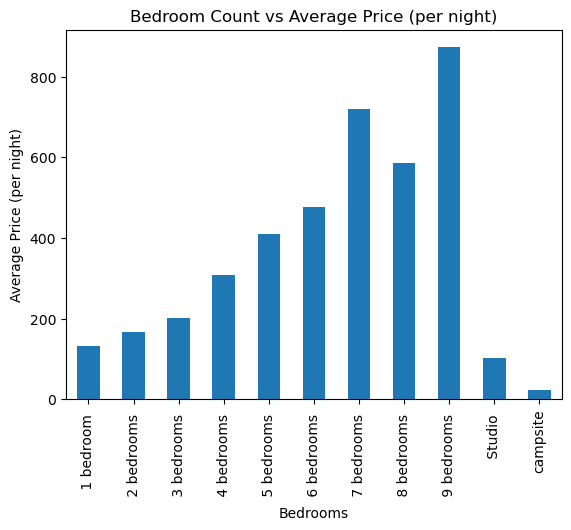

In [6]:
# Plot Average Price vs Number of Bedrooms

xvalues = air_bnb_asheville.groupby("bedrooms")["price"].mean()
xvalues.plot(kind="bar")
plt.xlabel("Bedrooms")
plt.ylabel("Average Price (per night)")
plt.title("Bedroom Count vs Average Price (per night)")
plt.xticks(rotation = 90)
plt.show()

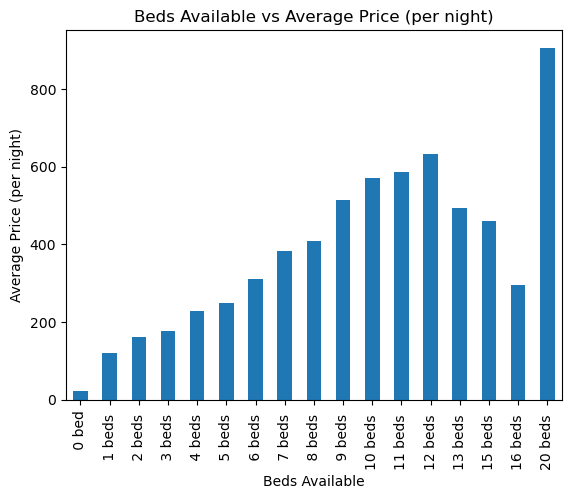

In [7]:
# Plot Average Price vs Number of Beds

xvalues = air_bnb_asheville.groupby("beds")["price"].mean()
xvalues.plot(kind="bar")
plt.xlabel("Beds Available")
plt.ylabel("Average Price (per night)")
plt.title("Beds Available vs Average Price (per night)")
plt.xticks(rotation = 90)
plt.show()

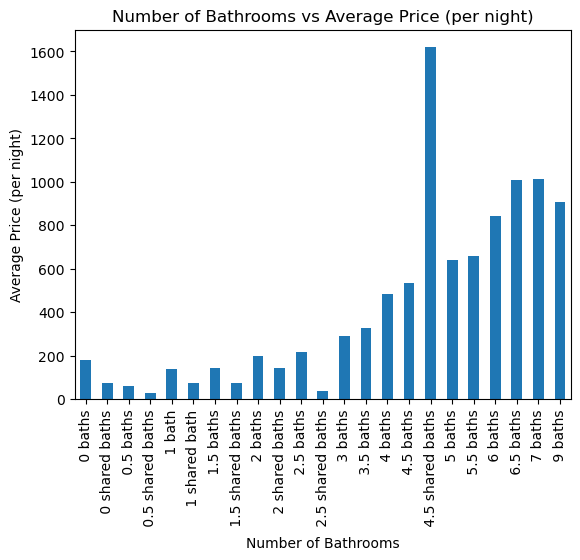

In [8]:
# Plot Average Price vs Number of Bathrooms

xvalues = air_bnb_asheville.groupby("bathrooms")["price"].mean()
xvalues.plot(kind="bar")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Average Price (per night)")
plt.title("Number of Bathrooms vs Average Price (per night)")
plt.xticks(rotation = 90)
plt.show()

In [9]:
# Grouped Bedrooms/Number of Beds vs Average Price

bedrooms_beds = air_bnb_asheville.groupby(['bedrooms','beds'])['price'].mean()
bedrooms_beds_df = pd.DataFrame(data=bedrooms_beds)
bedrooms_beds_df

price
bedrooms    beds                
 1 bedroom   1 beds   123.966507
             2 beds   159.797531
             3 beds   121.047619
             4 beds   104.000000
             5 beds    97.000000
...                          ...
 Studio      1 beds   101.235294
             2 beds   105.806452
             3 beds   106.000000
campsite     0 bed     22.750000
             1 beds    25.500000

[70 rows x 1 columns]

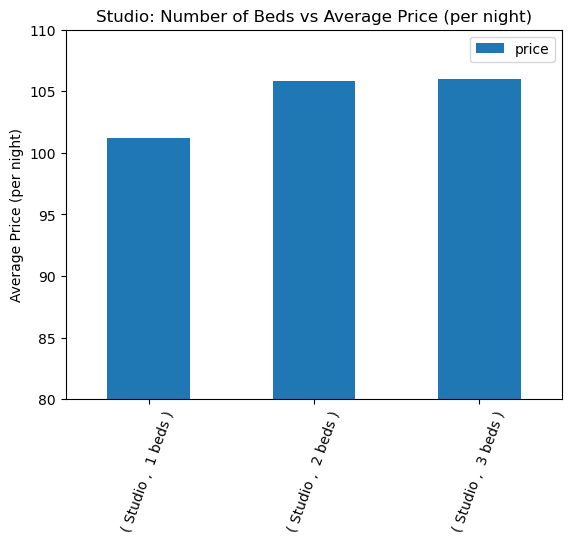

In [10]:
# Plot Studio/Number of Beds vs Average Price

studio_beds = bedrooms_beds_df.iloc[65:68,:]
studio_beds.plot(kind="bar")
plt.xlabel("")
plt.ylabel("Average Price (per night)")
plt.title("Studio: Number of Beds vs Average Price (per night)")
plt.xticks(rotation = 70)
plt.ylim(80, 110)
plt.show()

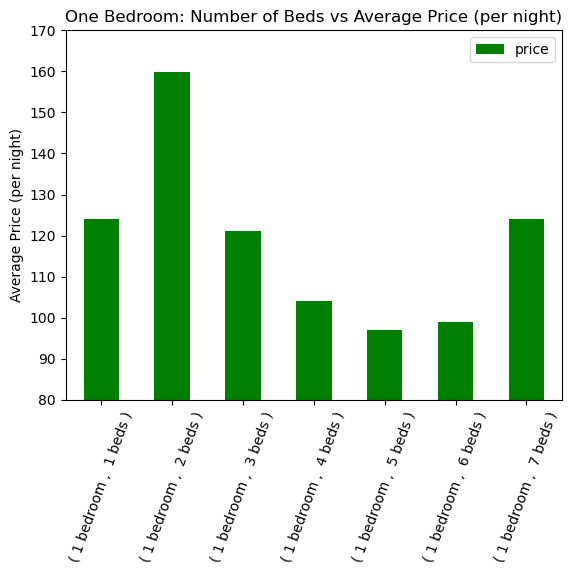

In [11]:
# Plot One Bedroom/Number of Beds vs Average Price

one_bedroom = bedrooms_beds_df.iloc[0:7,:]
one_bedroom.plot(kind="bar", color="green")
plt.xlabel("")
plt.ylabel("Average Price (per night)")
plt.title("One Bedroom: Number of Beds vs Average Price (per night)")
plt.xticks(rotation = 70)
plt.ylim(80, 170)
plt.show()

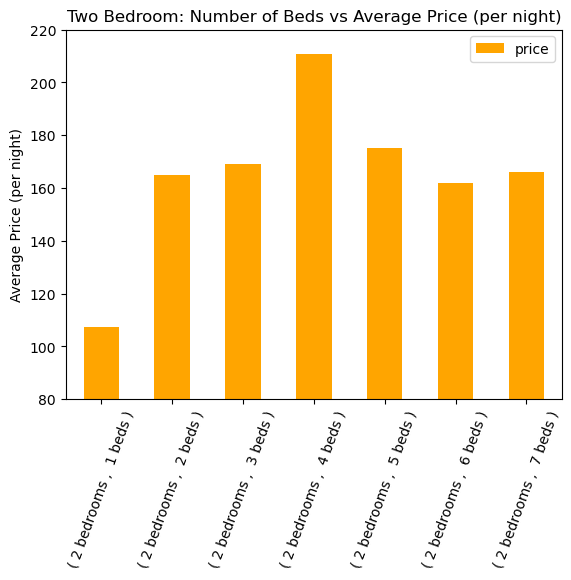

In [12]:
# Plot Two Bedroom/Number of Beds vs Average Price

two_bedroom = bedrooms_beds_df.iloc[8:15,:]
two_bedroom.plot(kind="bar", color="orange")
plt.xlabel("")
plt.ylabel("Average Price (per night)")
plt.title("Two Bedroom: Number of Beds vs Average Price (per night)")
plt.xticks(rotation = 70)
plt.ylim(80, 220)
plt.show()

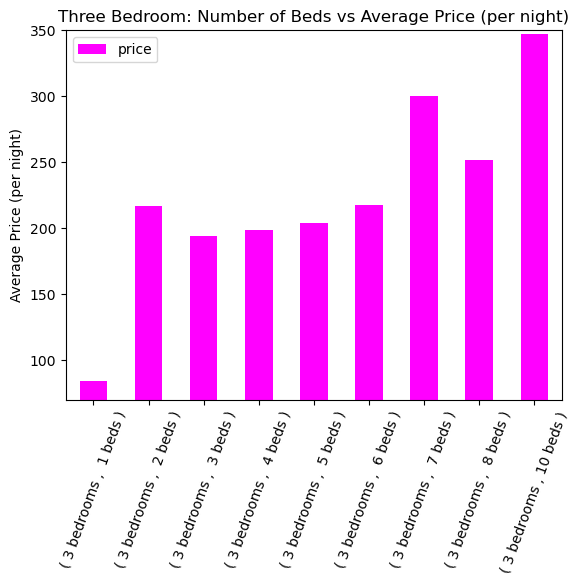

In [13]:
# Plot Three Bedroom/Number of Beds vs Average Price

three_bedrooms_bed = bedrooms_beds_df.iloc[15:24,:]
three_bedrooms_bed.plot(kind="bar", color="magenta")
plt.xlabel("")
plt.ylabel("Average Price (per night)")
plt.title("Three Bedroom: Number of Beds vs Average Price (per night)")
plt.xticks(rotation = 70)
plt.ylim(70, 350)
plt.show()

In [14]:
# Grouped Bedrooms/Number of Bathrooms vs Average Price

bedrooms_bathrooms = air_bnb_asheville.groupby(['bedrooms','bathrooms'])['price'].mean()
bedrooms_bathrooms_df = pd.DataFrame(data=bedrooms_bathrooms)
bedrooms_bathrooms_df

price
bedrooms    bathrooms                    
 1 bedroom   0 baths           111.600000
             0 shared baths     75.000000
             0.5 baths          62.800000
             0.5 shared baths   29.000000
             1 bath            137.918083
...                                   ...
 Studio      1 shared bath      54.000000
             1.5 baths          75.000000
campsite     0 baths            13.000000
             0.5 baths          38.000000
             1 bath             22.750000

[86 rows x 1 columns]

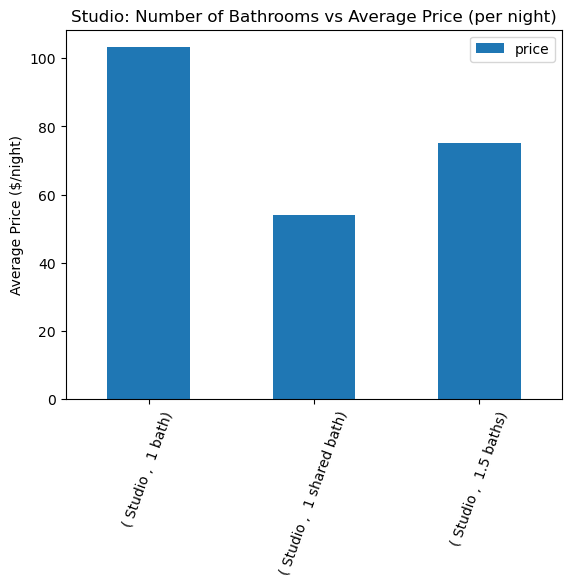

In [15]:
# Plot Studio/Number of Bathrooms vs Average Price

studio_bath = bedrooms_bathrooms_df.iloc[80:83,:]
studio_bath.plot(kind="bar")
plt.xlabel("")
plt.ylabel("Average Price ($/night)")
plt.title("Studio: Number of Bathrooms vs Average Price (per night)")
plt.xticks(rotation = 70)
plt.show()

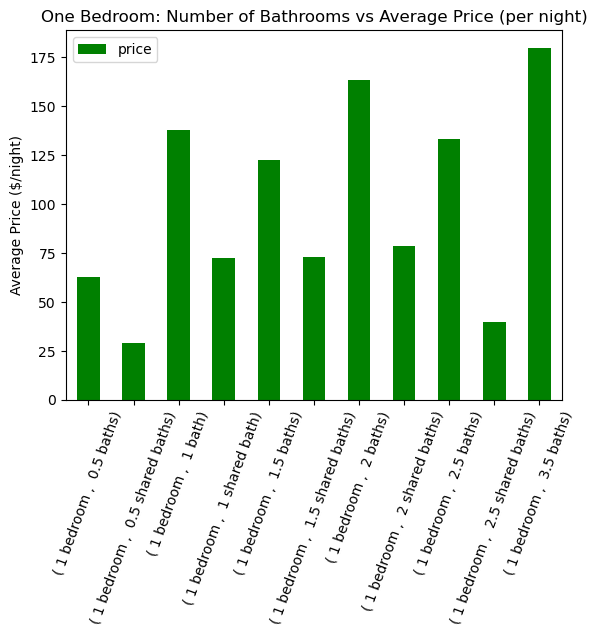

In [16]:
# Plot One Bedroom/Number of Bathrooms vs Average Price

one_bedroom_bath = bedrooms_bathrooms_df.iloc[2:13,:]
one_bedroom_bath.plot(kind="bar", color="green")
plt.xlabel("")
plt.ylabel("Average Price ($/night)")
plt.title("One Bedroom: Number of Bathrooms vs Average Price (per night)")
plt.xticks(rotation = 70)
plt.show()

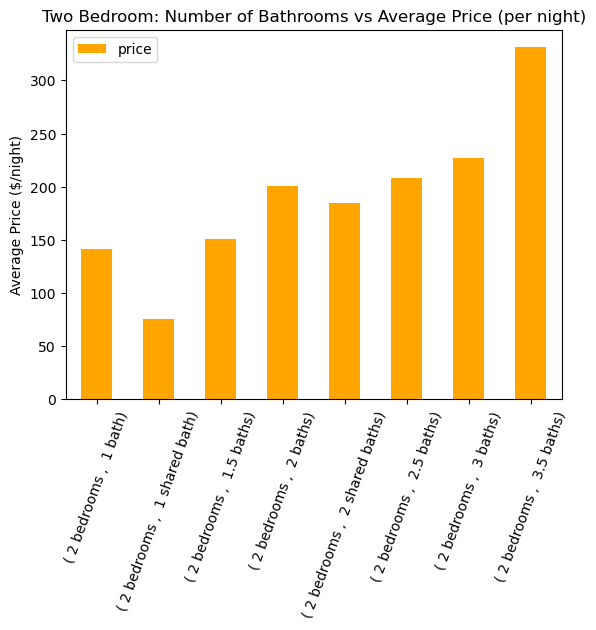

In [17]:
# Plot Two Bedroom/Number of Bathrooms vs Average Price

two_bedroom_baths = bedrooms_bathrooms_df.iloc[14:22,:]
two_bedroom_baths.plot(kind="bar", color='orange')
plt.xlabel("")
plt.ylabel("Average Price ($/night)")
plt.title("Two Bedroom: Number of Bathrooms vs Average Price (per night)")
plt.xticks(rotation = 70)
plt.show()

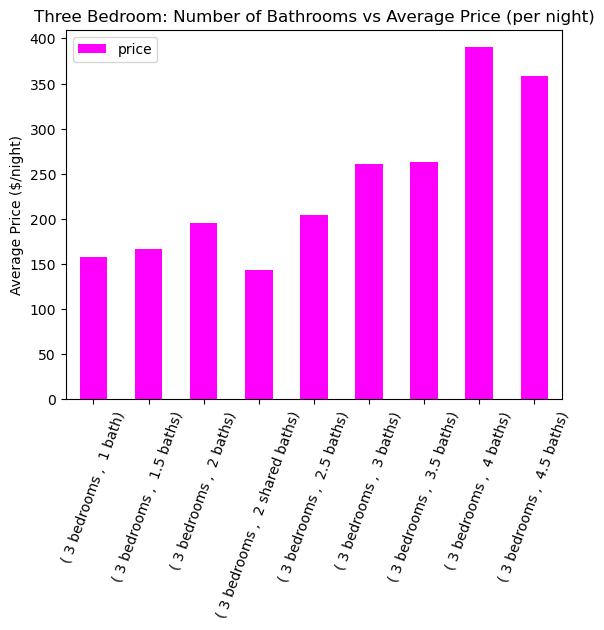

In [18]:
# Plot Three Bedroom/Number of Bathrooms vs Average Price

three_bedrooms_baths = bedrooms_bathrooms_df.iloc[23:32,:]
three_bedrooms_baths.plot(kind="bar", color='magenta')
plt.xlabel("")
plt.ylabel("Average Price ($/night)")
plt.title("Three Bedroom: Number of Bathrooms vs Average Price (per night)")
plt.xticks(rotation = 70)
plt.show()

In [19]:
# Grouped Bedrooms/Room Type vs Average Price

types_bedrooms_price = air_bnb_asheville.groupby(['bedrooms','room_type'])['price'].mean()
types_bedrooms_price_df = pd.DataFrame(data=types_bedrooms_price)
one_two_three_bedrooms = types_bedrooms_price_df.iloc[0:8,:]
studio_bedrooms = types_bedrooms_price_df.iloc[18:20,:]
studio_bedrooms
dfs_list = [studio_bedrooms, one_two_three_bedrooms]
bedrooms_roomtype_price_merge = pd.concat(dfs_list)
bedrooms_roomtype_price_merge

price
bedrooms     room_type                    
 Studio      Entire home/apt    102.008696
             Private room       118.000000
 1 bedroom   Bed and breakfast  347.400000
             Entire home/apt    134.455663
             Private room       122.148688
             Shared room         62.777778
 2 bedrooms  Entire home/apt    166.845188
             Private room       182.666667
 3 bedrooms  Entire home/apt    201.346570
             Private room       115.500000

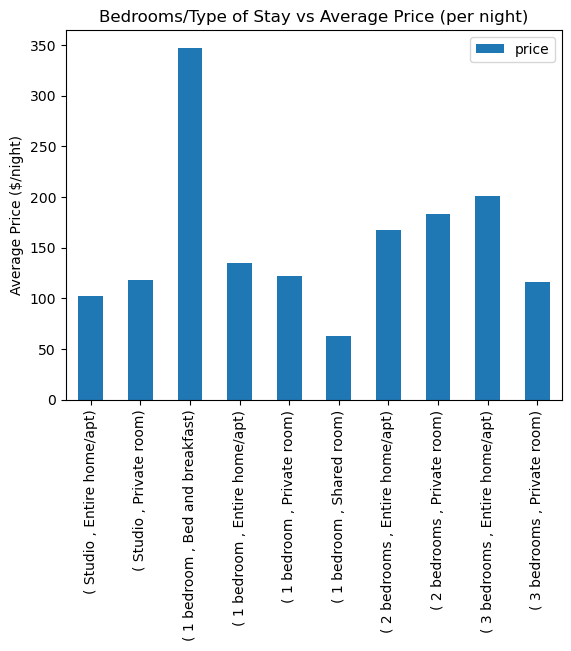

In [20]:
# Plot Bedrooms/Type of Stay vs Average Price

bedrooms_roomtype_price_merge.plot(kind="bar")
plt.xlabel("")
plt.ylabel("Average Price ($/night)")
plt.title("Bedrooms/Type of Stay vs Average Price (per night)")
plt.xticks(rotation = 90)
plt.show()

In [21]:
# Create DataFrame with Reviews greater than 35

air_bnb_asheville_reviews = air_bnb_asheville.loc[air_bnb_asheville["number_of_reviews"] > 35]
air_bnb_asheville_reviews

,id,listing_url,name,bedrooms,beds,bathrooms,accommodates,price,room_type,review_scores_rating,...,host_since,current_host_listings,total_host_listings_count,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,2.090680e+05,https://www.airbnb.com/rooms/209068,Guest suite in Asheville,1 bedroom,2 beds,1 bath,4,95,Entire home/apt,4.85,...,8/28/2011,1,1,2,47,7/8/2023,1.43,5,318,16
1,4.274970e+05,https://www.airbnb.com/rooms/427497,Guest suite in Asheville,1 bedroom,1 beds,1 bath,2,159,Entire home/apt,4.85,...,3/12/2012,1,1,3,47,6/12/2022,1.53,1,0,0
2,4.833840e+05,https://www.airbnb.com/rooms/483384,Cottage in Asheville,1 bedroom,1 beds,1 bath,3,146,Entire home/apt,4.85,...,3/27/2011,1,2,1,54,9/4/2023,1.93,1,155,10
3,6.212430e+05,https://www.airbnb.com/rooms/621243,Rental unit in Asheville,1 bedroom,2 beds,1 bath,2,155,Entire home/apt,4.85,...,7/28/2012,1,2,1,202,9/10/2023,7.36,10,151,90
5,8.406960e+05,https://www.airbnb.com/rooms/840696,Home in Asheville,2 bedrooms,2 beds,2 baths,4,239,Entire home/apt,4.71,...,12/12/2012,1,1,3,72,9/4/2023,1.47,2,365,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,8.170000e+17,https://www.airbnb.com/rooms/816651955599520669,Home in Asheville,2 bedrooms,4 beds,2 baths,6,198,Entire home/apt,4.82,...,3/20/2017,1528,2351,30,117,8/17/2023,1.16,1,73,2
3279,8.270000e+17,https://www.airbnb.com/rooms/827291744666665563,Home in Asheville,3 bedrooms,3 beds,2.5 baths,8,106,Entire home/apt,4.69,...,3/20/2017,1528,2351,1,65,8/9/2023,4.62,18,289,53
3280,8.470000e+17,https://www.airbnb.com/rooms/846986376815412901,Home in Fletcher,3 bedrooms,5 beds,3 baths,8,137,Entire home/apt,4.62,...,3/20/2017,1528,2351,2,146,8/7/2023,2.12,1,163,20
3282,8.850000e+17,https://www.airbnb.com/rooms/884908539438212086,Home in Candler,3 bedrooms,3 beds,2 baths,6,121,Entire home/apt,4.82,...,3/20/2017,1528,2351,3,118,7/16/2023,2.17,1,157,12


In [22]:
# Group New DataFrame by Bedrooms/Room Type and Average of Each of the 7 Scores

types_bedrooms_accuracy = air_bnb_asheville_reviews.groupby(['bedrooms','room_type'])['review_scores_accuracy'].mean()
types_bedrooms_cleanliness = air_bnb_asheville_reviews.groupby(['bedrooms','room_type'])['review_scores_cleanliness'].mean()
types_bedrooms_value = air_bnb_asheville_reviews.groupby(['bedrooms','room_type'])['review_scores_value'].mean()
types_bedrooms_communication = air_bnb_asheville_reviews.groupby(['bedrooms','room_type'])['review_scores_communication'].mean()
types_bedrooms_location = air_bnb_asheville_reviews.groupby(['bedrooms','room_type'])['review_scores_location'].mean()
types_bedrooms_check_in = air_bnb_asheville_reviews.groupby(['bedrooms','room_type'])['review_scores_checkin'].mean()
types_bedrooms_ratings = air_bnb_asheville_reviews.groupby(['bedrooms','room_type'])['review_scores_rating'].mean()

# Convert grouped data into Dataframes

types_bedrooms_accuracy_df = pd.DataFrame(data=types_bedrooms_accuracy)
types_bedrooms_cleanliness_df = pd.DataFrame(data=types_bedrooms_cleanliness)
types_bedrooms_value_df = pd.DataFrame(data=types_bedrooms_value)
types_bedrooms_communication_df = pd.DataFrame(data=types_bedrooms_communication)
types_bedrooms_check_in_df = pd.DataFrame(data=types_bedrooms_check_in)
types_bedrooms_location_df = pd.DataFrame(data=types_bedrooms_location)
types_bedrooms_ratings_df = pd.DataFrame(data=types_bedrooms_ratings)

# Merge Dataframes

first_merge = pd.merge(types_bedrooms_accuracy_df,types_bedrooms_cleanliness_df, on=['bedrooms','room_type']).merge(types_bedrooms_value_df,on=['bedrooms','room_type'])
second_merge = pd.merge(types_bedrooms_communication_df,types_bedrooms_check_in_df, on=['bedrooms','room_type']).merge(types_bedrooms_location_df,on=['bedrooms','room_type'])
review_df = pd.merge(first_merge,second_merge, on=['bedrooms','room_type']).merge(types_bedrooms_ratings_df,on=['bedrooms','room_type'])
review_df

review_scores_accuracy  \
bedrooms     room_type                                   
 1 bedroom   Bed and breakfast                4.958333   
             Entire home/apt                  4.956838   
             Private room                     4.947212   
             Shared room                      4.868333   
 2 bedrooms  Entire home/apt                  4.929752   
             Private room                     4.938333   
 3 bedrooms  Entire home/apt                  4.884524   
             Private room                     4.885000   
 4 bedrooms  Entire home/apt                  4.810185   
             Private room                     4.900000   
 5 bedrooms  Entire home/apt                  4.740833   
 6 bedrooms  Entire home/apt                  4.724000   
 8 bedrooms  Entire home/apt                  4.400000   
 9 bedrooms  Entire home/apt                  4.153333   
 Studio      Entire home/apt                  4.963210   
             Private room                     4.966667   
campsite     Entire home/apt                  4.980000   

                                review_scores_cleanliness  \
bedrooms     room_type                                      
 1 bedroom   Bed and breakfast                   4.947500   
             Entire home/apt                     4.945017   
             Private room                        4.931549   
             Shared room                         4.860000   
 2 bedrooms  Entire home/apt                     4.914988   
             Private room                        4.922222   
 3 bedrooms  Entire home/apt                     4.870030   
             Private room                        4.880000   
 4 bedrooms  Entire home/apt                     4.808519   
             Private room                        4.950000   
 5 bedrooms  Entire home/apt                     4.674167   
 6 bedrooms  Entire home/apt                     4.766000   
 8 bedrooms  Entire home/apt                     4.345000   
 9 bedrooms  Entire home/apt                     4.396667   
 Studio      Entire home/apt                     4.954815   
             Private room                        4.963333   
campsite     Entire home/apt                     4.993333   

                                review_scores_value  \
bedrooms     room_type                                
 1 bedroom   Bed and breakfast             4.914167   
             Entire home/apt               4.907086   
             Private room                  4.880398   
             Shared room                   4.813333   
 2 bedrooms  Entire home/apt               4.840596   
             Private room                  4.833333   
 3 bedrooms  Entire home/apt               4.747173   
             Private room                  4.715000   
 4 bedrooms  Entire home/apt               4.654444   
             Private room                  4.690000   
 5 bedrooms  Entire home/apt               4.602083   
 6 bedrooms  Entire home/apt               4.544000   
 8 bedrooms  Entire home/apt               4.245000   
 9 bedrooms  Entire home/apt               3.960000   
 Studio      Entire home/apt               4.914568   
             Private room                  4.900000   
campsite     Entire home/apt               4.910000   

                                review_scores_communication  \
bedrooms     room_type                                        
 1 bedroom   Bed and breakfast                     4.978333   
             Entire home/apt                       4.973063   
             Private room                          4.969469   
             Shared room                           4.936667   
 2 bedrooms  Entire home/apt                       4.955906   
             Private room                          4.954444   
 3 bedrooms  Entire home/apt                       4.913452   
             Private room                          4.830000   
 4 bedrooms  Entire home/apt                       4.879259   
             Private room     

In [23]:
# Narrow Dataframe into 4 Groups

review_filtered_df = review_df.iloc[0:8,:]
review_filtered_df
review_filtered_studio = review_df.iloc[14:16,:]
review_filtered_studio
df_list = [review_filtered_df, review_filtered_studio]
review_merge = pd.concat(df_list)
review_merged = review_merge.rename =['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_value',
                       'review_scores_communication', 'review_scores_location', 'review_scores_checkin',
                       'review_scores_rating']
review_merge

review_scores_accuracy  \
bedrooms     room_type                                   
 1 bedroom   Bed and breakfast                4.958333   
             Entire home/apt                  4.956838   
             Private room                     4.947212   
             Shared room                      4.868333   
 2 bedrooms  Entire home/apt                  4.929752   
             Private room                     4.938333   
 3 bedrooms  Entire home/apt                  4.884524   
             Private room                     4.885000   
 Studio      Entire home/apt                  4.963210   
             Private room                     4.966667   

                                review_scores_cleanliness  \
bedrooms     room_type                                      
 1 bedroom   Bed and breakfast                   4.947500   
             Entire home/apt                     4.945017   
             Private room                        4.931549   
             Shared room                         4.860000   
 2 bedrooms  Entire home/apt                     4.914988   
             Private room                        4.922222   
 3 bedrooms  Entire home/apt                     4.870030   
             Private room                        4.880000   
 Studio      Entire home/apt                     4.954815   
             Private room                        4.963333   

                                review_scores_value  \
bedrooms     room_type                                
 1 bedroom   Bed and breakfast             4.914167   
             Entire home/apt               4.907086   
             Private room                  4.880398   
             Shared room                   4.813333   
 2 bedrooms  Entire home/apt               4.840596   
             Private room                  4.833333   
 3 bedrooms  Entire home/apt               4.747173   
             Private room                  4.715000   
 Studio      Entire home/apt               4.914568   
             Private room                  4.900000   

                                review_scores_communication  \
bedrooms     room_type                                        
 1 bedroom   Bed and breakfast                     4.978333   
             Entire home/apt                       4.973063   
             Private room                          4.969469   
             Shared room                           4.936667   
 2 bedrooms  Entire home/apt                       4.955906   
             Private room                          4.954444   
 3 bedrooms  Entire home/apt                       4.913452   
             Private room                          4.830000   
 Studio      Entire home/apt                       4.974815   
             Private room                          4.993333   

                                review_scores_checkin  review_scores_location  \
bedrooms     room_type                                                          
 1 bedroom   Bed and breakfast               4.980000                4.860833   
             Entire home/apt                 4.975397                4.911738   
             Private room                    4.967743                4.898496   
             Shared room                     4.955000                4.890000   
 2 bedrooms  Entire home/apt                 4.962804                4.891092   
             Private room                    4.966667                4.896667   
 3 bedrooms  Entire home/apt                 4.937857                4.848601   
             Private room                    4.885000                4.920000   
 Studio      Entire home/apt                 4.975185                4.916790   
             Private room                    4.986667                4.816667   

                                review_scores_rating  
bedrooms     room_type                                
 1 bedroom   Bed and breakfast              4.914167  
             Entire home/apt                4.

C:\Users\User\AppData\Local\Temp\ipykernel_20464\84710771.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(studio_scores_transposed.index, rotation=70)


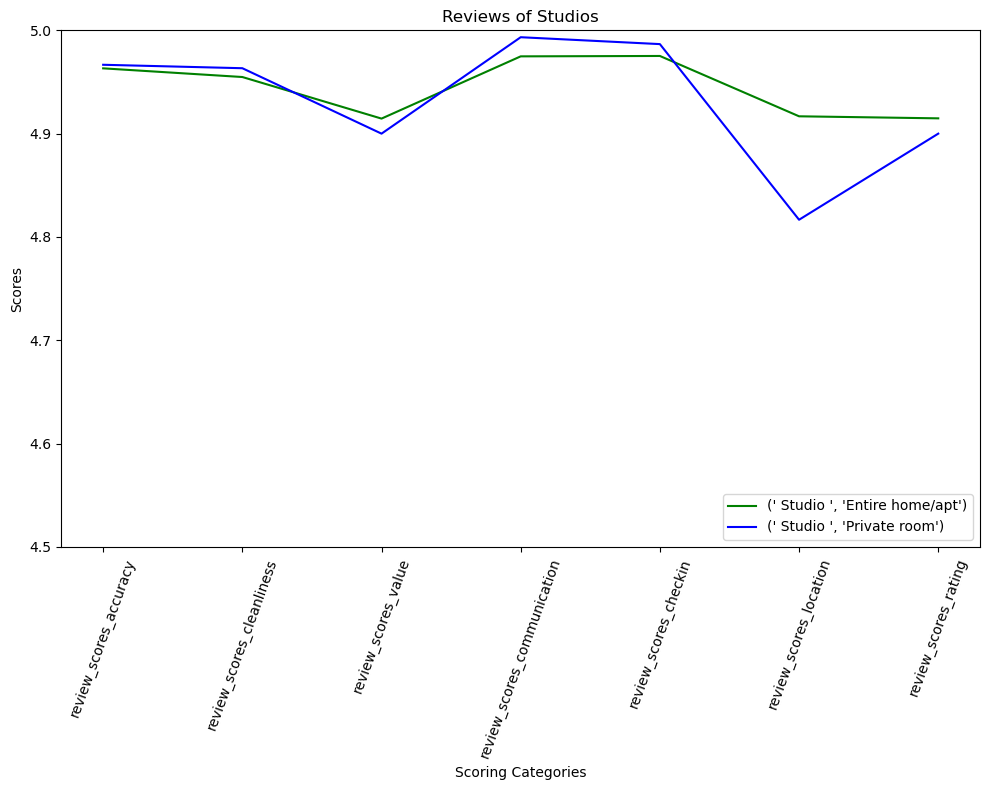

In [24]:
# Plot Different Roomtypes for Studios and their related Scores

studio_scores_transposed = review_filtered_studio.T
colors = ['g', 'b']

fig, ax = plt.subplots(figsize=(10, 8))

for i, col in enumerate(studio_scores_transposed.columns):
    ax.plot(studio_scores_transposed[col], label=col, color=colors[i])

ax.set_xticklabels(studio_scores_transposed.index, rotation=70)
ax.set_ylim(4.5, 5.0)
ax.legend(loc='lower right')

plt.xlabel("Scoring Categories")
plt.ylabel("Scores")
plt.title("Reviews of Studios")
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_20464\1883610098.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(one_bedroom_scores_transposed.index, rotation=70)


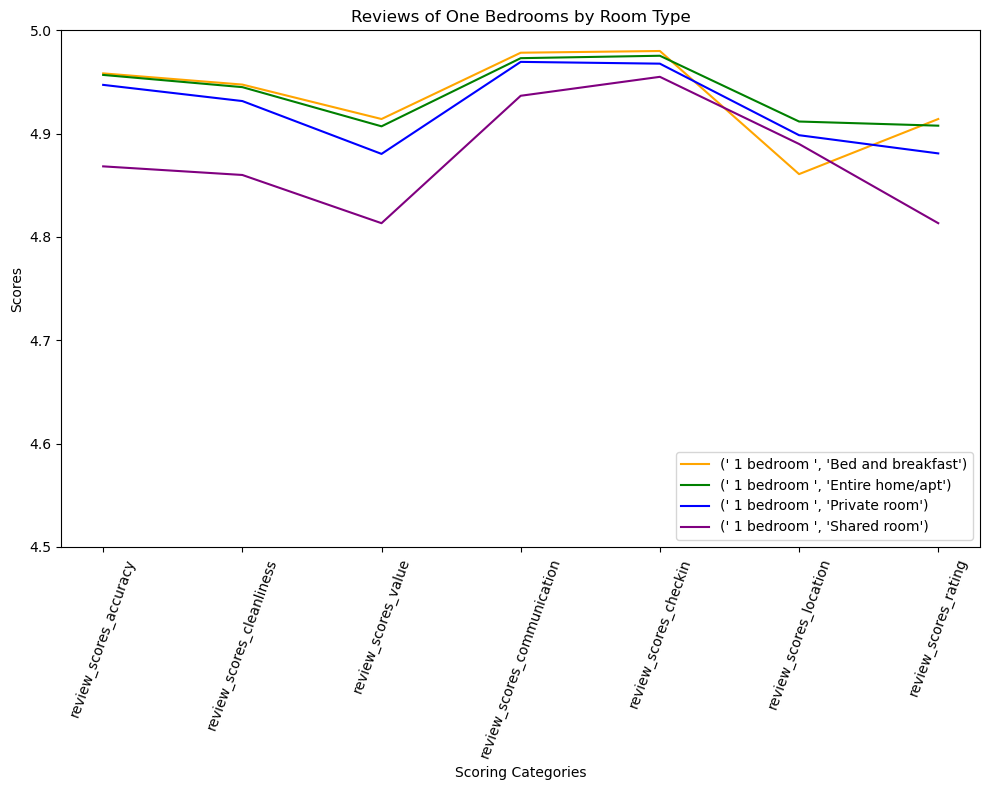

In [25]:
# Plot Different Roomtypes for One Bedroom and their related Scores

one_bedroom_scores = review_merge.iloc[0:4, :]
one_bedroom_scores_transposed = one_bedroom_scores.T

colors = ['orange', 'g', 'b', 'purple']

fig, ax = plt.subplots(figsize=(10, 8))

for i, col in enumerate(one_bedroom_scores_transposed.columns):
    ax.plot(one_bedroom_scores_transposed[col], label=col, color=colors[i])

ax.set_xticklabels(one_bedroom_scores_transposed.index, rotation=70)
ax.set_ylim(4.5, 5.0)
ax.legend(loc='lower right')

plt.xlabel("Scoring Categories")
plt.ylabel("Scores")
plt.title("Reviews of One Bedrooms by Room Type")
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_20464\1727217888.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(two_bedroom_scores_transposed.index, rotation=70)


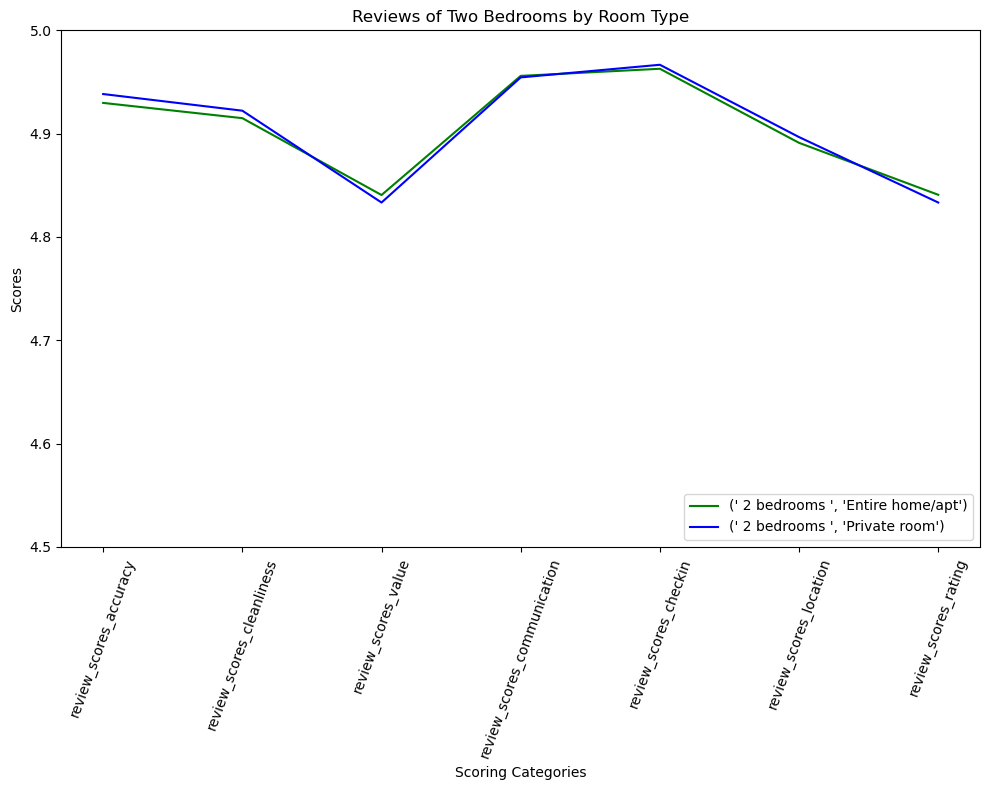

In [26]:
# Plot Different Roomtypes for Two Bedroom and their related Scores

two_bedroom_scores = review_merge.iloc[4:6, :]
two_bedroom_scores_transposed = two_bedroom_scores.T

colors = ['g', 'b']

fig, ax = plt.subplots(figsize=(10, 8))

for i, col in enumerate(two_bedroom_scores_transposed.columns):
    ax.plot(two_bedroom_scores_transposed[col], label=col, color=colors[i])

ax.set_xticklabels(two_bedroom_scores_transposed.index, rotation=70)
ax.set_ylim(4.5, 5.0)
ax.legend(loc='lower right')

plt.xlabel("Scoring Categories")
plt.ylabel("Scores")
plt.title("Reviews of Two Bedrooms by Room Type")
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_20464\1591376766.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(three_bedroom_scores_transposed.index, rotation=70)


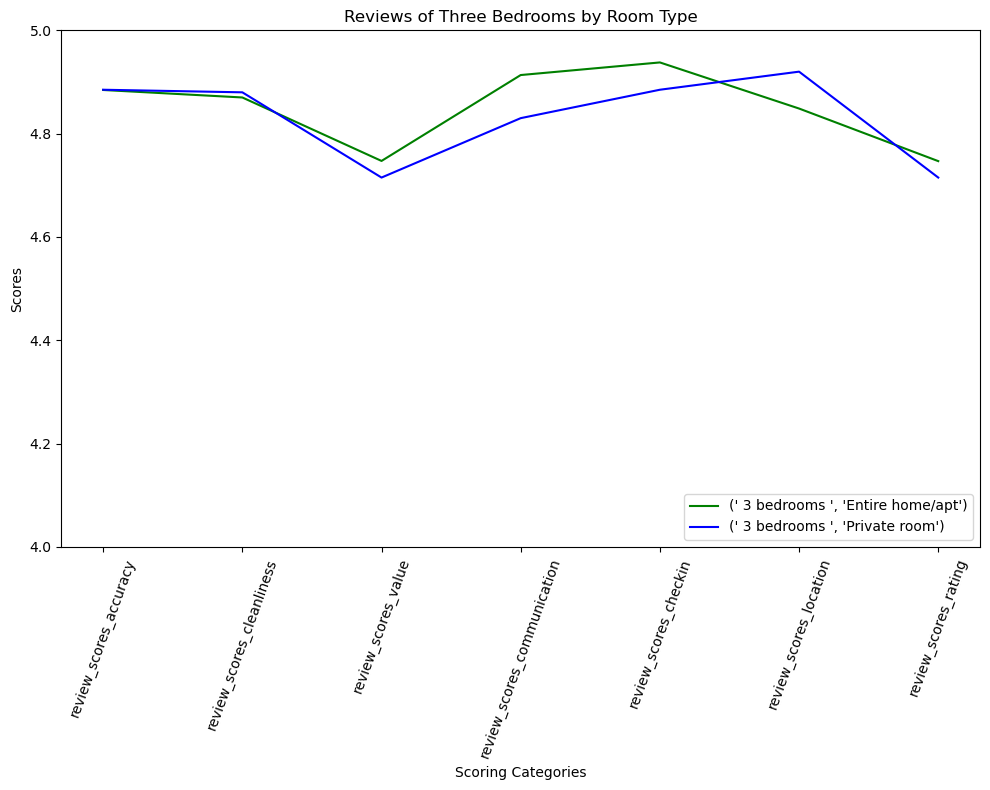

In [27]:
# Plot Different Roomtypes for Three Bedroom and their related Scores

three_bedroom_scores = review_merge.iloc[6:8, :]
three_bedroom_scores_transposed = three_bedroom_scores.T

colors = ['g', 'b']

fig, ax = plt.subplots(figsize=(10, 8))

for i, col in enumerate(three_bedroom_scores_transposed.columns):
    ax.plot(three_bedroom_scores_transposed[col], label=col, color=colors[i])

ax.set_xticklabels(three_bedroom_scores_transposed.index, rotation=70)
ax.set_ylim(4.0, 5.0)
ax.legend(loc='lower right')

plt.xlabel("Scoring Categories")
plt.ylabel("Scores")
plt.title("Reviews of Three Bedrooms by Room Type")
plt.tight_layout()
plt.show()

In [28]:
# Calculated Average Score Ratings for Each Host(Host ID)

host_ratings = air_bnb_asheville.groupby(['host_id', 'host_name', 'current_host_listings', 'total_host_listings_count'])['review_scores_rating'].mean()
host_ratings_df = pd.DataFrame(host_ratings)
host_ratings_dfs = host_ratings_df.sort_values(by='total_host_listings_count', ascending=False)
host_ratings_dfs.reset_index(inplace=True)
host_ratings_dfs

,host_id,host_name,current_host_listings,total_host_listings_count,review_scores_rating
0,121681645,Evolve,1528,2351,4.804000
1,124060715,Evolve,673,1485,4.840000
2,456511812,Evolve,1173,1444,4.700000
3,520869021,Cozyliving Suites,726,1219,NaN
4,151397468,Evolve,509,1165,4.687059
...,...,...,...,...,...
2080,59658375,Kristi,1,1,4.890000
2081,59527470,Deanna,1,1,NaN
2082,59527284,Raquel,1,1,5.000000
2083,59350899,Su-Mei,1,1,NaN


In [29]:
# Calculated Average Score Ratings for Each Host(Host ID) with Total Listings Between 2-4 and

small_host_ratings_dfs = host_ratings_dfs.loc[host_ratings_dfs["total_host_listings_count"] < 5]
small_host_ratings = small_host_ratings_dfs.loc[small_host_ratings_dfs["total_host_listings_count"] > 2]

#Caclulated mean

print("mean scores rating: " + str(small_host_ratings["review_scores_rating"].mean()))
small_host_ratings

mean scores rating: 4.837418154761904


,host_id,host_name,current_host_listings,total_host_listings_count,review_scores_rating
263,79463303,Selina,4,4,4.94
264,158764029,Brennen & Sheila,2,4,4.25
265,99625066,Dustin,3,4,5.00
266,46228285,Kathryn,2,4,4.87
267,212479893,Alex,2,4,5.00
...,...,...,...,...,...
610,18450336,Michele,2,3,4.86
611,426871738,Lorna &Patrick,1,3,5.00
612,9391284,Violit,1,3,NaN
613,24629376,Mary,2,3,4.71


In [30]:
# Calculated Average Score Ratings for Each Host(Host ID) with Total Listings Greater than 5

large_host_ratings = host_ratings_dfs.loc[host_ratings_dfs["total_host_listings_count"] > 5]

#Caclulated mean

print("mean scores rating: " + str(large_host_ratings["review_scores_rating"].mean()))
large_host_ratings

mean scores rating: 4.77450315256619


,host_id,host_name,current_host_listings,total_host_listings_count,review_scores_rating
0,121681645,Evolve,1528,2351,4.804000
1,124060715,Evolve,673,1485,4.840000
2,456511812,Evolve,1173,1444,4.700000
3,520869021,Cozyliving Suites,726,1219,NaN
4,151397468,Evolve,509,1165,4.687059
...,...,...,...,...,...
195,82692497,Elva,2,6,4.750000
196,3868549,Marty & Robyn,1,6,NaN
197,3028199,Florencia,5,6,4.834000
198,64331718,Melody,6,6,4.770000


In [31]:
# Dropped N/A values for plotting

large_host_drop = large_host_ratings.dropna(subset=['review_scores_rating'])
small_host_drop = small_host_ratings.dropna(subset=['review_scores_rating'])
large_host = large_host_drop["review_scores_rating"]
small_host = small_host_drop["review_scores_rating"]

(array([ 1.,  0.,  0.,  1.,  3.,  0.,  0.,  1.,  1.,  2.,  0.,  6.,  7.,
         4., 10., 20., 26., 46., 32., 32.]),
 array([3.70375  , 3.7685625, 3.833375 , 3.8981875, 3.963    , 4.0278125,
        4.092625 , 4.1574375, 4.22225  , 4.2870625, 4.351875 , 4.4166875,
        4.4815   , 4.5463125, 4.611125 , 4.6759375, 4.74075  , 4.8055625,
        4.870375 , 4.9351875, 5.       ]),
 <BarContainer object of 20 artists>)

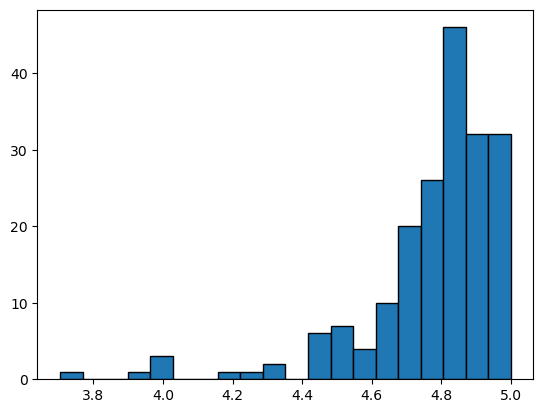

In [32]:
# Plot Historgram to Check for Normality of Hosts with more than 5 Listings

plt.hist(large_host, edgecolor='black', bins=20)

In [33]:
# Shapiro Test to check for Normality

shapiro(large_host)

ShapiroResult(statistic=0.7974849343299866, pvalue=4.810981545463238e-15)

(array([ 2.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  3.,  4.,  4.,  9.,
        13., 27., 31., 40., 76., 61., 63.]),
 array([3.98 , 4.031, 4.082, 4.133, 4.184, 4.235, 4.286, 4.337, 4.388,
        4.439, 4.49 , 4.541, 4.592, 4.643, 4.694, 4.745, 4.796, 4.847,
        4.898, 4.949, 5.   ]),
 <BarContainer object of 20 artists>)

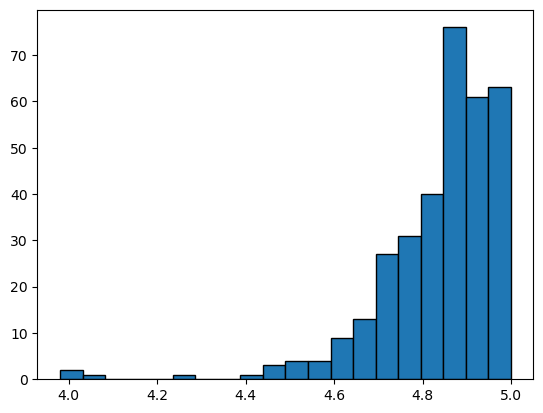

In [34]:
# Plot Historgram to Check for Normality of Hosts with between 2-4 Listings

plt.hist(small_host, edgecolor='black', bins=20)

In [35]:
# Shapiro Test to check for Normality

shapiro(small_host)

ShapiroResult(statistic=0.8187527656555176, pvalue=3.9845101406102104e-19)

In [36]:
# Ttest of Significance Population

stats.ttest_ind(small_host, large_host, equal_var=False) 

TtestResult(statistic=3.7092807356895166, pvalue=0.00024823895468541245, df=295.4971097259717)

In [37]:
# Collect 50 Sets of Random Samples from Population and Calculate Mean of Each set(Host with Few Listings)

sample_size = 50
num_sets = 50

# List to store the sampled DataFrames
sampled_sets = []
sampled_set_means_small = []

# Loop to generate 50 sets of random samples
for _ in range(num_sets):
    sampled_data = small_host.sample(n=sample_size, random_state=42)
    sampled_sets.append(sampled_data)

# Loop to calculate the mean of each sampled set
for i in range(num_sets):
    mean = sampled_sets[i].mean()
    sampled_set_means_small.append(mean)

# Display the first few rows of the first sampled set and its mean
sampled_set_means_small[0]

4.864850000000001

In [38]:
# Collect 50 Sets of Random Samples from Population and Calculate Mean of Each set(Host with Many Listings)

sample_size = 50
num_sets = 50

# List to store the sampled DataFrames
sampled_sets = []
sampled_set_means_large = []

# Loop to generate 50 sets of random samples
for _ in range(num_sets):
    sampled_data = large_host.sample(n=sample_size, random_state=42)
    sampled_sets.append(sampled_data)

# Loop to calculate the mean of each sampled set
for i in range(num_sets):
    mean = sampled_sets[i].mean()
    sampled_set_means_large.append(mean)

# Display the first few rows of the first sampled set and its mean
sampled_set_means_large[0]

4.752118095238095

In [39]:
# Ttest of Significance for Sampled Data of Population

stats.ttest_ind(sampled_set_means_small, sampled_set_means_large, equal_var=False) 

C:\Users\User\anaconda2\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


TtestResult(statistic=888473887487339.9, pvalue=0.0, df=49.0)

In [40]:
# host_accuracy = air_bnb_asheville.groupby(['host_id', 'host_name', 'current_host_listings', 'total_host_listings_count'])['review_scores_accuracy'].mean()
# host_accuracy_df = pd.DataFrame(host_accuracy)
# host_accuracy_dfs = host_accuracy_df.sort_values(by='total_host_listings_count', ascending=False)
# host_accuracy_dfs.reset_index(inplace=True)
# host_accuracy_dfs

In [41]:
# small_host_accuracy = host_accuracy_dfs.loc[host_accuracy_dfs["total_host_listings_count"] < 5]
# small_host_accuracy

In [42]:
# large_host_accuracy = host_accuracy_dfs.loc[host_accuracy_dfs["total_host_listings_count"] > 5]
# large_host_accuracy